In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data_1 = [
    {
        "Host": "MD4",
        "B1_8_ratio": "0:1",
        "CFSE_lo": 72,
        "preGC_lo": 61,
    },
    {
        "Host": "MD4",
        "B1_8_ratio": "1:1",
        "CFSE_lo": 42,
        "preGC_lo": 15,
    },
    {
        "Host": "MD4",
        "B1_8_ratio": "3:1",
        "CFSE_lo": 26,
        "preGC_lo": 4,
    },
    {
        "Host": "WT",
        "B1_8_ratio": "0:1",
        "CFSE_lo": 50,
        "preGC_lo": 26,
    }
]
df_1 = pd.DataFrame(data_1)
print(df_1)

  Host B1_8_ratio  CFSE_lo  preGC_lo
0  MD4        0:1       72        61
1  MD4        1:1       42        15
2  MD4        3:1       26         4
3   WT        0:1       50        26


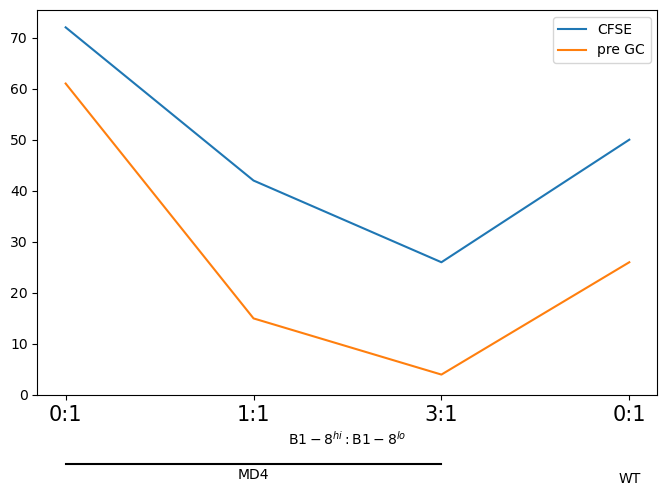

In [4]:
# If using df from pandas:
# binding = df["Binding"].values
# presentation = df["Presentation"].values
# b18 = df["B1_8_hi"].values
# hosts = df["Host"].values

# Or directly from `data`:
CFSE = [d["CFSE_lo"] for d in data_1]
preGC = [d["preGC_lo"] for d in data_1]
b18_ratio = [d["B1_8_ratio"] for d in data_1]
hosts = [d["Host"] for d in data_1]

x = np.arange(len(CFSE))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, CFSE, label="CFSE")
ax.plot(x, preGC, label="pre GC")

# 1-line x tick labels (only B1-8^hi)
ax.set_ylim(bottom = 0)
ax.set_xticks(x)
ax.set_xticklabels(b18_ratio, fontsize = 15)
ax.set_xlabel(r"$\mathrm{B1-8}^{hi}:\mathrm{B1-8}^{lo}$")
# ax.set_ylabel("Value (×10³)")
ax.legend()

# --- ADD GROUP BRACKET FOR MD4 ---
# The MD4 samples are indices 1, 2, 3
# new clear axis overlay with 0-1 limits
start, end = 0, 2
y = 0 - 0.18*np.ptp(ax.get_ylim())   # position below x-axis
ax.plot([start, end], [y, y], color="k", lw=1.5, clip_on=False)
ax.text((start+end)/2, y - 0.01*np.ptp(ax.get_ylim()), "MD4",
        ha="center", va="top")

# WT is only sample 0
ax.text(3, y - 0.02*np.ptp(ax.get_ylim()), "WT", ha="center", va="top")

# Expand plot limits to make space
ax.margins(y=0.2)

# fig.savefig()

In [5]:
data_2 = [
    {
        "Host": "WT",
        "B1_8_hi": "-",
        "Test": "B1-8^lo",
        "Affinity": 8e-6,
        "Binding": 5,
        "Presentation": 4,
    },
    {
        "Host": "MD4",
        "B1_8_hi": "-",
        "Test": "B1-8^lo",
        "Affinity": 8e-6,
        "Binding": 5,
        "Presentation": 5,
    },
    {
        "Host": "MD4",
        "B1_8_hi": "+",
        "Test": "B1-8^lo",
        "Affinity": 8e-6,
        "Binding": 5,
        "Presentation": 4.5,
    },
    {
        "Host": "MD4",
        "B1_8_hi": "+",
        "Test": "B1-8^hi",
        "Affinity": 2e-7,
        "Binding": 14,
        "Presentation": 20,
    },
]
df_2 = pd.DataFrame(data_2)
print(df_2)

  Host B1_8_hi     Test      Affinity  Binding  Presentation
0   WT       -  B1-8^lo  8.000000e-06        5           4.0
1  MD4       -  B1-8^lo  8.000000e-06        5           5.0
2  MD4       +  B1-8^lo  8.000000e-06        5           4.5
3  MD4       +  B1-8^hi  2.000000e-07       14          20.0


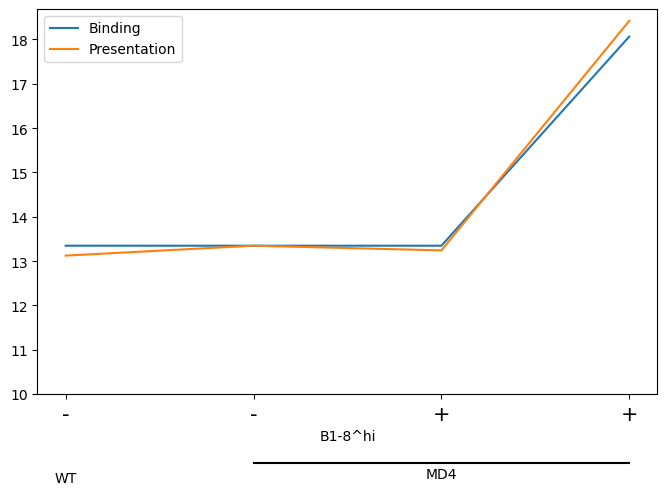

In [6]:
# If using df from pandas:
# binding = df["Binding"].values
# presentation = df["Presentation"].values
# b18 = df["B1_8_hi"].values
# hosts = df["Host"].values

# Or directly from `data`:
binding = [-np.log(d['Affinity']/d["Binding"]) for d in data_2]
presentation = [-np.log(d['Affinity']/d["Presentation"]) for d in data_2]
b18 = [d["B1_8_hi"] for d in data_2]
hosts = [d["Host"] for d in data_2]

x = np.arange(len(b18))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, binding, label="Binding")
ax.plot(x, presentation, label="Presentation")

# 1-line x tick labels (only B1-8^hi)
ax.set_ylim(bottom = 10)
ax.set_xticks(x)
ax.set_xticklabels(b18, fontsize = 15)
ax.set_xlabel("B1-8^hi")
# ax.set_ylabel("Value (×10³)")
ax.legend()

# --- ADD GROUP BRACKET FOR MD4 ---
# The MD4 samples are indices 1, 2, 3
# new clear axis overlay with 0-1 limits
start, end = 1, 3
y = 10 - 0.18*np.ptp(ax.get_ylim())   # position below x-axis
ax.plot([start, end], [y, y], color="k", lw=1.5, clip_on=False)
ax.text((start+end)/2, y - 0.01*np.ptp(ax.get_ylim()), "MD4",
        ha="center", va="top")

# WT is only sample 0
ax.text(0, y - 0.02*np.ptp(ax.get_ylim()), "WT", ha="center", va="top")

# Expand plot limits to make space
ax.margins(y=0.2)

# fig.savefig()

In [11]:
data_3 = [
    {
        "Antigen_dose_ug": 5,
        "B1_8_ratio": "0:1",
        "CFSE_lo": 20,
        "preGC_lo": 20,
    },
    {
        "Antigen_dose_ug": 5,
        "B1_8_ratio": "1:1",
        "CFSE_lo": 10,
        "preGC_lo": 8,
    },
    {
        "Antigen_dose_ug": 8,
        "B1_8_ratio": "0:1",
        "CFSE_lo": 72,
        "preGC_lo": 61,
    },
    {
        "Antigen_dose_ug": 8,
        "B1_8_ratio": "1:1",
        "CFSE_lo": 42,
        "preGC_lo": 15,
    },
    {
        "Antigen_dose_ug": 50,
        "B1_8_ratio": "0:1",
        "CFSE_lo": 75,
        "preGC_lo": 65,
     },
    {
        "Antigen_dose_ug": 50,
        "B1_8_ratio": "1:1",
        "CFSE_lo": 30,
        "preGC_lo": 22,
    },
    {
        "Antigen_dose_ug": 200,
        "B1_8_ratio": "0:1",
        "CFSE_lo": 85,
        "preGC_lo": 80,
    },
    {
        "Antigen_dose_ug": 200,
        "B1_8_ratio": "1:1",
        "CFSE_lo": 60,
        "preGC_lo": 40,
    }
]
df_3 = pd.DataFrame(data_3)
print(df_3)
df_long = df_3.melt(
    id_vars=["Antigen_dose_ug", "B1_8_ratio"],
    value_vars=["CFSE_lo", "preGC_lo"],
    var_name="Measurement",
    value_name="Value"
)

   Antigen_dose_ug B1_8_ratio  CFSE_lo  preGC_lo
0                5        0:1       20        20
1                5        1:1       10         8
2                8        0:1       72        61
3                8        1:1       42        15
4               50        0:1       75        65
5               50        1:1       30        22
6              200        0:1       85        80
7              200        1:1       60        40


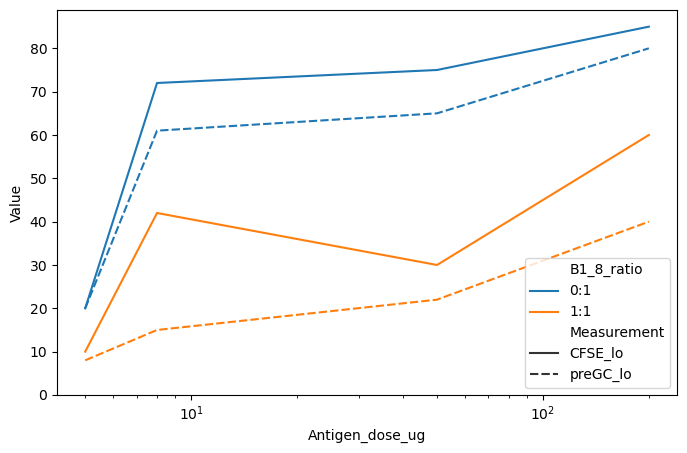

In [15]:
# If using df from pandas:

x = np.arange(len(b18))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data = df_long, x = "Antigen_dose_ug", y = 'Value', style = 'Measurement', hue = 'B1_8_ratio', ax = ax)

# 1-line x tick labels (only B1-8^hi)
ax.set_ylim(bottom = 0)
ax.set_xscale('log')
# ax.set_xticks(x)
# ax.set_xticklabels(b18_ratio, fontsize = 15)
# ax.set_xlabel(r"$\mathrm{B1-8}^{hi}:\mathrm{B1-8}^{lo}$")
# ax.set_ylabel("Value (×10³)")
ax.legend()

# Expand plot limits to make space
ax.margins(y=0.2)

# fig.savefig()

In [13]:
melted = df_3.melt(
    id_vars=["Antigen_dose_ug", "B1_8_ratio"],
    value_vars=["CFSE_lo", "preGC_lo"],
    var_name="Measurement",
    value_name="Value",
)
# print(melted)
# Pivot so we get columns "0:1" and "1:1" for each (dose, measurement)
pivot = (
    melted
    .pivot_table(
        index=["Antigen_dose_ug", "Measurement"],
        columns="B1_8_ratio",
        values="Value"
    )
    .reset_index()
)
pivot["ratio_1_1_over_0_1"] =  pivot["0:1"] / pivot["1:1"]
print(melted)
print(df_3)
print(pivot)

    Antigen_dose_ug B1_8_ratio Measurement  Value
0                 5        0:1     CFSE_lo     20
1                 5        1:1     CFSE_lo     10
2                 8        0:1     CFSE_lo     72
3                 8        1:1     CFSE_lo     42
4                50        0:1     CFSE_lo     75
5                50        1:1     CFSE_lo     30
6               200        0:1     CFSE_lo     85
7               200        1:1     CFSE_lo     60
8                 5        0:1    preGC_lo     20
9                 5        1:1    preGC_lo      8
10                8        0:1    preGC_lo     61
11                8        1:1    preGC_lo     15
12               50        0:1    preGC_lo     65
13               50        1:1    preGC_lo     22
14              200        0:1    preGC_lo     80
15              200        1:1    preGC_lo     40
   Antigen_dose_ug B1_8_ratio  CFSE_lo  preGC_lo
0                5        0:1       20        20
1                5        1:1       10         8
2  

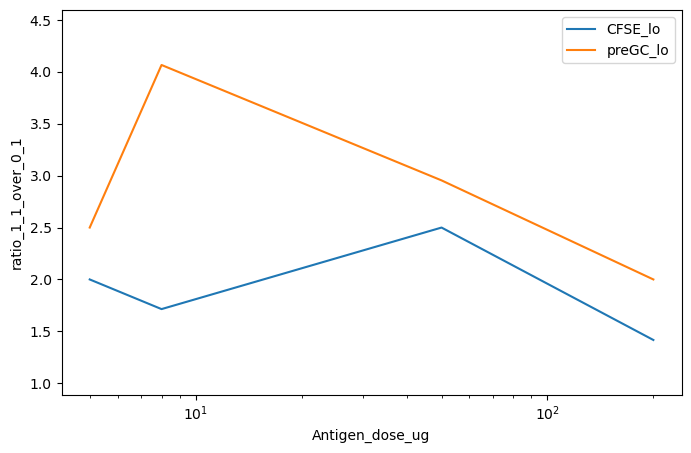

In [14]:
# If using df from pandas:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(data = pivot, x = "Antigen_dose_ug", y = 'ratio_1_1_over_0_1', hue = 'Measurement', ax = ax)

# 1-line x tick labels (only B1-8^hi)
# ax.set_ylim(bottom = 0)
ax.set_xscale('log')
# ax.set_xticks(x)
# ax.set_xticklabels(b18_ratio, fontsize = 15)
# ax.set_xlabel(r"$\mathrm{B1-8}^{hi}:\mathrm{B1-8}^{lo}$")
# ax.set_ylabel("Value (×10³)")
ax.legend()

# Expand plot limits to make space
ax.margins(y=0.2)

# fig.savefig()